In [259]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

f = lambda x: np.sin(x)
h = 0.01

a = 0
b = np.pi

e = 1e-5

X = np.linspace(0,2*np.pi,100)
Y = [f(x) for x in X]

**Derivação Numérica: Fórmula dos 3 Pontos**

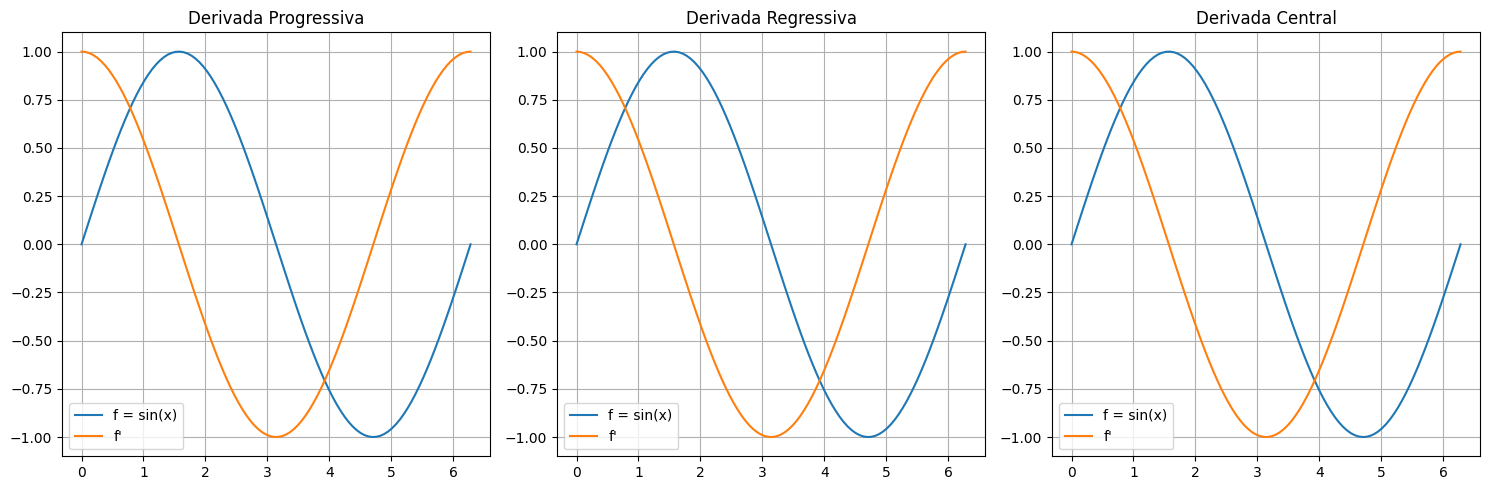

In [260]:
def d3(f, x, h, method = 'forward'):
    if method == 'forward':
        return (-3*f(x) + 4*f(x + h) - f(x + 2*h)) / (2*h)
    elif method == 'backward':
        return (f(x - 2*h) - 4*f(x - h) + 3*f(x)) / (2*h)
    elif method == 'central':
        return (f(x + h) - f(x - h)) / (2*h)

dY_f = [d3(f, x, h, method='forward') for x in X]
dY_b = [d3(f, x, h, method='backward') for x in X]
dY_c = [d3(f, x, h, method='central') for x in X]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(X, Y, '-', label='f = sin(x)')
axs[0].plot(X, dY_f, '-', label='f\'')
axs[0].set_title('Derivada Progressiva')
axs[0].legend()
axs[0].grid()

axs[1].plot(X, Y, '-', label='f = sin(x)')
axs[1].plot(X, dY_b, '-', label='f\'')
axs[1].set_title('Derivada Regressiva')
axs[1].legend()
axs[1].grid()

axs[2].plot(X, Y, '-', label='f = sin(x)')
axs[2].plot(X, dY_c, '-', label='f\'')
axs[2].set_title('Derivada Central')
axs[2].legend()
axs[2].grid()

plt.tight_layout()
plt.show()

**Derivação Numérica: Fórmula dos 5 Pontos**

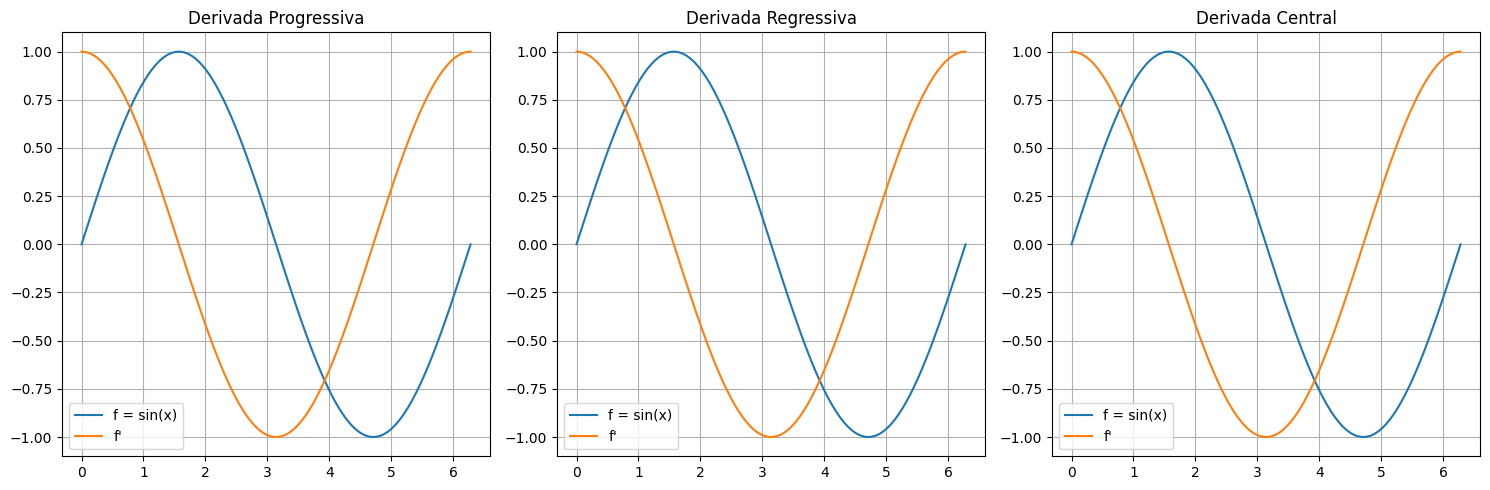

In [261]:
def d5(f, x, h, method = 'forward'):
    if method == 'forward':
        return (-25*f(x) + 48*f(x + h) - 36*f(x + 2*h) + 16*f(x + 3*h) - 3*f(x + 4*h)) / (12*h)
    elif method == 'backward':
        return (3*f(x - 4*h) - 16*f(x - 3*h) + 36*f(x - 2*h) - 48*f(x - h) + 25*f(x)) / (12*h)
    elif method == 'central':
        return (f(x - 2*h) - 8*f(x - h) + 8*f(x + h) - f(x + 2*h)) / (12*h)

dY_f = [d5(f, x, h, method='forward') for x in X]
dY_b = [d5(f, x, h, method='backward') for x in X]
dY_c = [d5(f, x, h, method='central') for x in X]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(X, Y, '-', label='f = sin(x)')
axs[0].plot(X, dY_f, '-', label='f\'')
axs[0].set_title('Derivada Progressiva')
axs[0].legend()
axs[0].grid()

axs[1].plot(X, Y, '-', label='f = sin(x)')
axs[1].plot(X, dY_b, '-', label='f\'')
axs[1].set_title('Derivada Regressiva')
axs[1].legend()
axs[1].grid()

axs[2].plot(X, Y, '-', label='f = sin(x)')
axs[2].plot(X, dY_c, '-', label='f\'')
axs[2].set_title('Derivada Central')
axs[2].legend()
axs[2].grid()

plt.tight_layout()
plt.show()

**Derivação Numérica: Derivada Segunda**

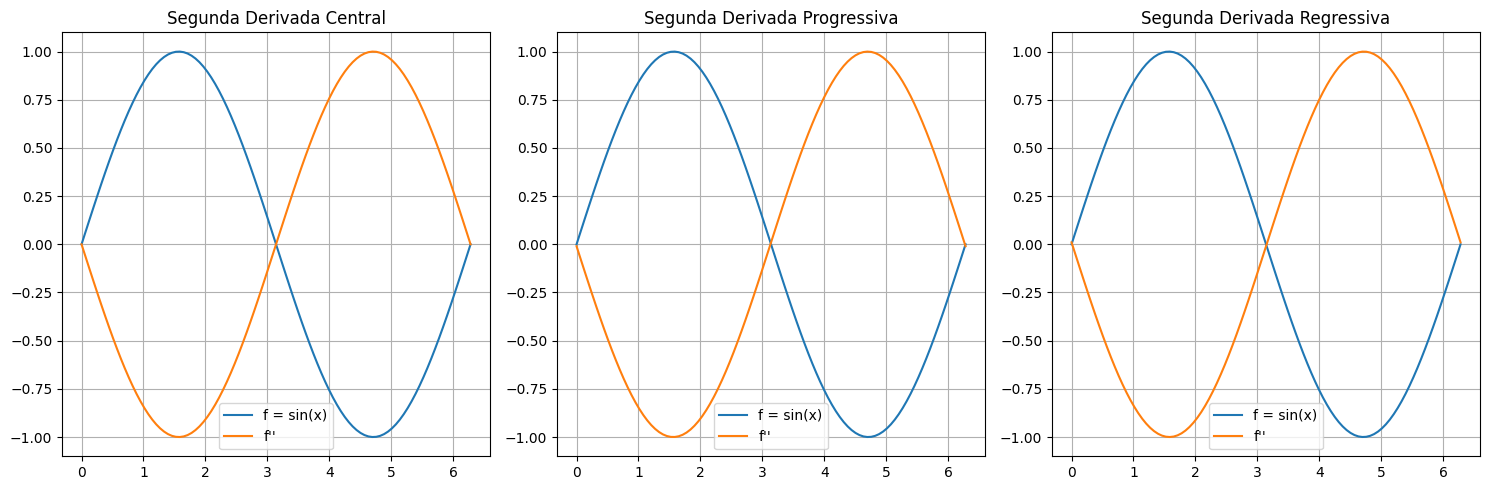

In [262]:
def segunda_derivada(f, x, h, method='central'):
    if method == 'central':
        return (f(x + h) - 2*f(x) + f(x - h)) / h**2
    elif method == 'forward':
        return (f(x + 2*h) - 2*f(x + h) + f(x)) / h**2
    elif method == 'backward':
        return (f(x) - 2*f(x - h) + f(x - 2*h)) / h**2

d2Y_central = [segunda_derivada(f, x, h, method='central') for x in X]
d2Y_forward = [segunda_derivada(f, x, h, method='forward') for x in X]
d2Y_backward = [segunda_derivada(f, x, h, method='backward') for x in X]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(X, Y, '-', label='f = sin(x)')
axs[0].plot(X, d2Y_central, '-', label='f\'\'')
axs[0].set_title('Segunda Derivada Central')
axs[0].legend()
axs[0].grid()

axs[1].plot(X, Y, '-', label='f = sin(x)')
axs[1].plot(X, d2Y_forward, '-', label='f\'\'')
axs[1].set_title('Segunda Derivada Progressiva')
axs[1].legend()
axs[1].grid()

axs[2].plot(X, Y, '-', label='f = sin(x)')
axs[2].plot(X, d2Y_backward, '-', label='f\'\'')
axs[2].set_title('Segunda Derivada Regressiva')
axs[2].legend()
axs[2].grid()

plt.tight_layout()
plt.show()


**Derivação Numérica: Extrapolação de Richardson**

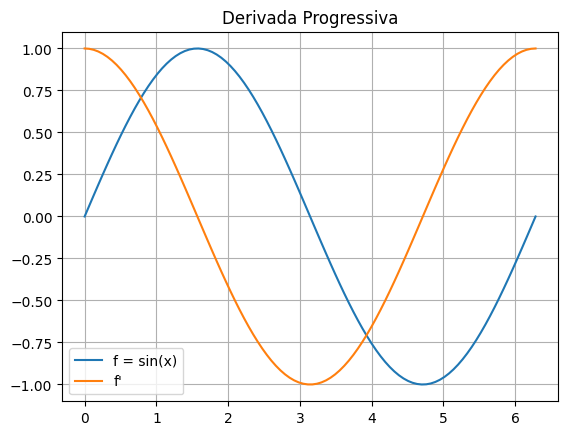

In [263]:
def richardson(f, x, h, method = 'central', k = 1):
    R = np.zeros((k+1, k+1))
    
    for i in range(k+1):
        R[i, 0] = d3(f, x, h / (2 ** i), method)
    
    for j in range(1, k+1):
        for i in range(j, k+1):
            R[i, j] = R[i, j-1] + (R[i, j-1] - R[i-1, j-1]) / (4**j - 1)
    
    return R[-1, -1]

dY_richardson = [richardson(f, x, h) for x in X]

plt.plot(X, Y, '-', label='f = sin(x)')
plt.plot(X, dY_richardson, '-', label='f\'')
plt.title('Derivada Progressiva')
plt.legend()
plt.grid()
plt.show()


**Integração Numérica: Método dos Trapézios**

In [264]:
def trapezoidal_integration(f, a, b, i = 100):
    X = np.linspace(a,b,i+1)
    Y = [f(x) for x in X]

    h = (b - a) / i
    integral =  0

    for i in range(1, i+1):
        integral += (Y[i] + Y[i - 1]) 
    return (h/2) * integral

print(trapezoidal_integration(f,a,b))


1.999835503887444


**Integração Numérica: 1/3 de Simpson**

In [265]:
def simpson_13(f, a, b, i = 2):
    i += 1 if i % 2 != 0 else i
        
    X = np.linspace(a, b, i + 1)
    Y = [f(x) for x in X]

    h = (b - a) / i
    integral = Y[0] + Y[-1]
    
    for j in range(1, i):
        if j % 2 == 0:
            integral += 2 * Y[j]
        else:
            integral += 4 * Y[j]
    return (h/3) * integral


print(simpson_13(f,a,b,100))

2.0000000006764735


**Integração Numérica: 3/8 de Simpson**

In [266]:
def simpson_38(f, a, b, i = 2):
    i += 3 - (i % 3) if i % 3 != 0 else i
    
    X = np.linspace(a, b, i + 1) 
    Y = [f(x) for x in X]

    h = (b - a) / i
    integral = Y[0] + Y[-1]
    
    for j in range(1, i):
        if j % 3 == 0:
            integral += 2 * Y[j]
        else:
            integral += 3 * Y[j]
    return (3 * h/8) * integral


print(simpson_38(f,a,b,100))

2.000000022502818


**Integração Numérica: Regra do Ponto Médio**

In [267]:
def midpoint_integration(f, a, b, i = 100):
    h = (b - a) / (i + 2)
    integral = 0
    
    for j in range(i + 2):
        mid = a + h * (j + 0.5)
        integral += f(mid)
    return h * integral

print(midpoint_integration(f,a,b))

2.0000790551509464


**Integração Numérica: Romberg**

In [268]:
def romberg(f, a, b, n = 4):
    R = np.zeros((n, n)) 

    for i in range(n):
        R[i, 0] = trapezoidal_integration(f, a, b, 2**i)
    
    for j in range(1, n):
        for i in range(j, n):
            R[i, j] = R[i, j-1] + (R[i, j-1] - R[i-1, j-1]) / (4**j - 1)
    
    return R[-1, -1] #, R


print(romberg(f,a,b))

2.0000055499796705


**Integração Numérica: Quadratura Adaptativa**

In [269]:
def adaptive_quadrature(f, a, b, e):
    c = (a + b) / 2

    S = simpson_13(f, a, b)
    S1 = simpson_13(f, a, c)
    S2 = simpson_13(f, c, b)
    
    error = abs(S1 + S2 - S)
    
    if error < 10 * e:
        return S1 + S2 + (S1 + S2 - S) / 10
    else:
        l = adaptive_quadrature(f, a, c, e / 2)
        r = adaptive_quadrature(f, c, b, e / 2)
        return l + r

print(adaptive_quadrature(f,a,b,e))


1.9999994776015604


**Integração Numérica: Quadratura de Gauss**

In [270]:
def gauss_legendre(n):
    Pn = sp.special.legendre(n)
    nodes = Pn.roots
    weights = 2 / ((1 - nodes**2) * (np.polyval(Pn.deriv(), nodes))**2)
    return nodes, weights

def gauss_quad(f, a, b, n):
    r, c = gauss_legendre(n)
    
    h1 = (b - a) / 2
    h2 = (b + a) / 2
    
    integral = 0

    for i in range(n):
        x = h1 * r[i] + h2
        integral += c[i] * f(x)

    return h1 * integral

print(gauss_quad(f, a, b, 6))


1.9999999994772732


**Integração Numérica: Integral Dupla de Simpson**

In [271]:
import numpy as np

def simpson_13_double(f, a, b, c, d, n = 2, m = 2):  
      
    h = (b - a) / n
    
    integral = 0.0
    
    for i in range(n + 1):
        x = a + i * h
        hx = (d(x) - c(x)) / m
        
        inner_integral = f(x, c(x)) + f(x, d(x))
        
        for j in range(1, m):

            y = c(x) + j*hx

            if j % 2 == 0:
                inner_integral += 2 * f(x, y)
            else:
                inner_integral += 4 * f(x, y)
        
        inner_integral = (hx / 3) * inner_integral
        
        if i == 0 or i == n:
            integral += inner_integral
        elif i % 2 == 0:
            integral += 2 * inner_integral
        else:
            integral += 4 * inner_integral
    
    return (h / 3) * integral

f = lambda x, y: x**2 + y**2

a, b = 0, 1

c = lambda x: 0
d = lambda x: 1

print(simpson_13_double(f, a, b, c, d, 4, 4))


0.6666666666666665


**Integração Numérica: Integral Dupla de Gauss**

In [272]:
def gauss_double(f, a, b, c, d, m = 2, n = 2):

    rx, cx = gauss_legendre(m)
    ry, cy = gauss_legendre(n)
    
    h1 = (b - a) / 2
    h2 = (b + a) / 2
    
    integral = 0.0
    
    for i in range(m):
        x = h1 * rx[i] + h2
        
        c1 = c(x)
        d1 = d(x)
        k1 = (d1 - c1) / 2
        k2 = (d1 + c1) / 2

        inner_integral = 0
        
        for j in range(n):
            y = k1 * ry[i] + k2
            inner_integral += cy[j] * f(x,y)
        integral += cx[i] * k1 * inner_integral

    return h1 * integral

print(gauss_double(f, a, b, c, d, 3, 3))

0.6666666666666663


**Integração Numérica: Integral Tripla de Gauss**

In [273]:
def gauss_triple(f, a, b, c, d, e, g, m = 2, n = 2, p = 2):
    rx, cx = gauss_legendre(m)
    ry, cy = gauss_legendre(n)
    rz, cz = gauss_legendre(p)
    
    h1 = (b - a) / 2
    h2 = (b + a) / 2
    
    integral = 0.0
    
    for i in range(m):
        x = h1 * rx[i] + h2
        
        c1 = c(x)
        d1 = d(x)
        k1 = (d1 - c1) / 2
        k2 = (d1 + c1) / 2
        
        for j in range(n):
            y = k1 * ry[j] + k2
            
            e1 = e(x, y)
            g1 = g(x, y)
            l1 = (g1 - e1) / 2
            l2 = (g1 + e1) / 2
            
            inner_integral = 0
            
            for k in range(p):
                z = l1 * rz[k] + l2
                inner_integral += cz[k] * f(x, y, z)
            
            integral += cx[i] * cy[j] * k1 * l1 * inner_integral

    return h1 * integral

f = lambda x, y, z: np.sqrt(x**2 + y**2)

a, b = -2, 2
c = lambda x: -np.sqrt(4-x**2)
d = lambda x: -c(x)
e = lambda x, y: np.sqrt(x**2 + y**2)
g = lambda x, y: 2

print(gauss_triple(f, a, b, c, d, e, g, 15, 15, 15))


8.346985426956921
